# Exploring Dandiset 000690: Allen Institute Openscope - Vision2Hippocampus project

## ⚠️ AI-Generated Content Warning
**Note**: This notebook was AI-generated and has not been fully verified. Please exercise caution when interpreting the code or results presented here.

## Overview

This notebook explores [Dandiset 000690 (version 0.250326.0015)](https://dandiarchive.org/dandiset/000690/0.250326.0015), a dataset from the Allen Institute Openscope program. This dataset contains extracellular electrophysiology recordings from multiple brain regions in mice, including visual cortex, higher order visual areas, and hippocampus, while the mice were presented with various visual stimuli.

The project aims to understand how neural representations of simple and natural stimuli evolve from the thalamus through primary visual cortex and most hippocampal regions, as well as some frontal areas. This research provides insights into how the brain transforms specific visual stimuli into abstract concepts.

## Required Packages

The following packages are required to work with this dataset:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import h5py
import remfile
from itertools import islice
import pynwb
from dandi.dandiapi import DandiAPIClient

# Configure plot styles
sns.set_theme()

## Accessing the Dandiset

First, we'll connect to the DANDI archive and retrieve the basic information about our dataset:

In [2]:
# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("000690", "0.250326.0015")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")
print(f"\nDescription: {metadata['description'][:500]}...\n")  # Truncated for readability

Dandiset name: Allen Institute Openscope - Vision2Hippocampus project
Dandiset URL: https://dandiarchive.org/dandiset/000690/0.250326.0015

Description: Extensive research shows that visual cortical neurons respond to specific stimuli, e.g. the primary visual cortical neurons respond to bars of light with specific orientation. In contrast, the hippocampal neurons are thought to encode not specific stimuli but instead represent abstract concepts such as space, time and events. How is this abstraction computed in the mouse brain? Specifically, how does the representation of simple visual stimuli evolve from the thalamus, which is a synapse away fr...



## Available Assets (Files)

Let's examine the assets available in this Dandiset. The assets include:

1. Session NWB files containing metadata for all probes
2. Probe-specific NWB files with electrophysiology data
3. Image NWB files with visual stimulus templates

In [3]:
# List some assets in the Dandiset
assets = dandiset.get_assets()
print("First 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

First 5 assets:
- sub-692077/sub-692077_ses-1300222049_probe-4_ecephys.nwb (ID: b0ea16d5-42eb-4b56-87cc-7d7b7efab4db)
- sub-692077/sub-692077_ses-1300222049_probe-3_ecephys.nwb (ID: e0ad1921-75f1-43ed-aa86-8e1a45a9f49d)
- sub-692077/sub-692077_ses-1300222049_probe-2_ecephys.nwb (ID: 97712120-158d-492a-ae21-61515335bc18)
- sub-692077/sub-692077_ses-1300222049_probe-0_ecephys.nwb (ID: de12ccea-83a7-4d7f-937c-4c02e4d3bf44)
- sub-692077/sub-692077_ses-1300222049.nwb (ID: 8ae65111-a130-47fc-a108-55e695374739)


## Exploring an NWB File

Now, let's load one of the main NWB files to explore its structure. We'll use subject 695435's session NWB file, which contains metadata about the recording session, including details of stimuli presented and neural responses.

In [4]:
# URL of the NWB file we want to examine
url = "https://api.dandiarchive.org/api/assets/d3cfc0e4-eaa6-4cc0-b1de-9ed257cf0009/download/"
print(f"Loading file: {url}")

# Open the remote file and create an NWB file reader
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

# Display basic NWB file information
print(f"\nSession ID: {nwb.session_id}")
print(f"Session description: {nwb.session_description}")
print(f"Session start time: {nwb.session_start_time}")
print(f"Subject: {nwb.subject.subject_id} (Age: {nwb.subject.age}, Sex: {nwb.subject.sex})")

Loading file: https://api.dandiarchive.org/api/assets/d3cfc0e4-eaa6-4cc0-b1de-9ed257cf0009/download/


/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.6.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.3.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."



Session ID: 1309235849
Session description: Data and metadata for an Ecephys session
Session start time: 2023-11-07 00:00:00-08:00
Subject: 695435 (Age: P109D, Sex: M)


This NWB file contains data from a recording session with a mouse. Let's explore the structure of the file to understand what kind of data is available.

In [5]:
# Display the available top-level groups in the NWB file

# Look at acquisition data
print("Acquisition data:")
for name in nwb.acquisition.keys():
    print(f"- {name}")

# Look at processing modules
print("\nProcessing modules:")
for name in nwb.processing.keys():
    print(f"- {name}")

# Look at intervals (stimulus presentations)
print("\nIntervals (first 5):")
interval_count = 0
for name in list(nwb.intervals.keys())[:5]:
    print(f"- {name}")
    interval_count += 1
print(f"... and {len(nwb.intervals) - interval_count} more interval groups")

# Look at electrode groups (probes)
print("\nElectrode groups:")
for name in nwb.electrode_groups.keys():
    probe = nwb.electrode_groups[name]
    print(f"- {name}: {probe.description}")
    print(f"  Sampling rate: {probe.device.sampling_rate} Hz")
    print(f"  LFP sampling rate: {probe.lfp_sampling_rate} Hz")

Acquisition data:
- EyeTracking
- raw_running_wheel_rotation
- running_wheel_signal_voltage
- running_wheel_supply_voltage

Processing modules:
- running
- stimulus

Intervals (first 5):
- Disco2SAC_Wd15_Vel2_Bndry1_Cntst0_loop_presentations
- Disk_Wd15_Vel2_Bndry1_Cntst0_loop_presentations
- GreenSAC_Wd15_Vel2_Bndry1_Cntst0_loop_presentations
- Ring_Wd15_Vel2_Bndry1_Cntst0_loop_presentations
- SAC_Wd15_Vel2_Bndry1_Cntst0_loop_presentations
... and 17 more interval groups

Electrode groups:
- probeA: Ecephys Electrode Group
  Sampling rate: 30000.0 Hz
  LFP sampling rate: 1250.0 Hz
- probeB: Ecephys Electrode Group
  Sampling rate: 30000.0 Hz
  LFP sampling rate: 1250.0 Hz
- probeD: Ecephys Electrode Group
  Sampling rate: 30000.0 Hz
  LFP sampling rate: 1250.0 Hz
- probeF: Ecephys Electrode Group
  Sampling rate: 30000.0 Hz
  LFP sampling rate: 1250.0 Hz


## Understanding the Neuroscience Experiment

This dataset contains recordings from multiple Neuropixels probes implanted in different brain regions while the mouse was shown various visual stimuli. 

The visual stimuli included:
1. Simple moving bars of light with different parameters:
   - Different widths (15° or 45°)
   - Different speeds (covering screen width in 2s or 6s)
   - Different contrasts (white on black or black on white)
   - Different patterns (e.g., "disco" bars with changing colors)

2. Natural movies involving eagles, snakes, and other wildlife

The experiment helps researchers understand how visual information is processed and transformed as it moves from visual areas to the hippocampus.

## Examining the Units (Recorded Neurons)

Number of units (neurons): 2251

Unit properties:
- peak_channel_id
- PT_ratio
- velocity_below
- snr
- silhouette_score
- waveform_halfwidth
- presence_ratio
- repolarization_slope
- d_prime
- cumulative_drift
- waveform_duration
- max_drift
- spread
- recovery_slope
- quality
- nn_hit_rate
- local_index
- nn_miss_rate
- firing_rate
- isi_violations
- isolation_distance
- cluster_id
- l_ratio
- velocity_above
- amplitude_cutoff
- amplitude


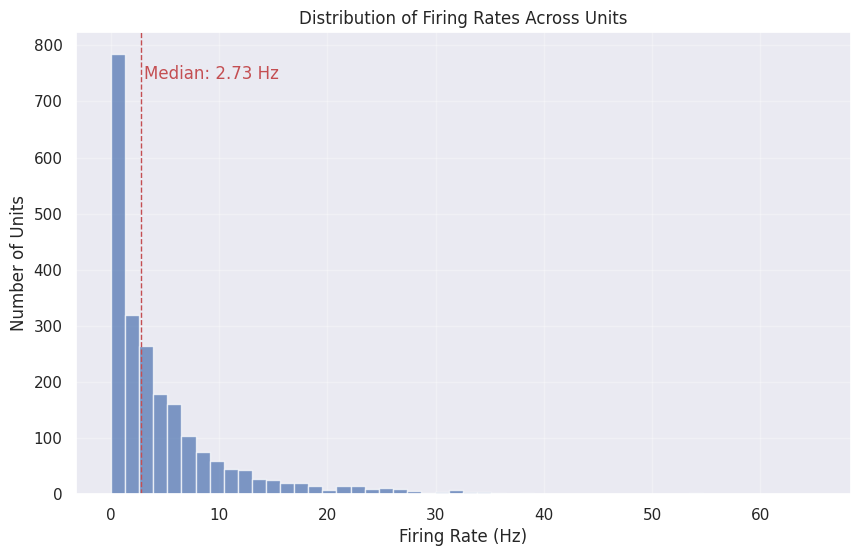

In [6]:
# Basic information about the recorded neurons
print(f"Number of units (neurons): {len(nwb.units)}")

# Let's examine the properties available for each unit
print("\nUnit properties:")
for column_name in nwb.units.colnames:
    if column_name not in ['spike_times', 'spike_amplitudes', 'waveform_mean']:
        print(f"- {column_name}")

# Plot distribution of firing rates
firing_rates = []
for i in range(len(nwb.units)):
    if 'firing_rate' in nwb.units.colnames:
        rate = nwb.units['firing_rate'][i]
        if rate is not None and not np.isnan(rate):
            firing_rates.append(rate)

plt.figure(figsize=(10, 6))
plt.hist(firing_rates, bins=50, alpha=0.7)
plt.xlabel('Firing Rate (Hz)')
plt.ylabel('Number of Units')
plt.title('Distribution of Firing Rates Across Units')
plt.axvline(np.median(firing_rates), color='r', linestyle='dashed', linewidth=1)
plt.text(np.median(firing_rates)*1.1, plt.ylim()[1]*0.9, 
         f'Median: {np.median(firing_rates):.2f} Hz', color='r')
plt.grid(True, alpha=0.3)
plt.savefig('firing_rates_histogram.png', dpi=100)
plt.show()

## Exploring the Visual Stimuli

The experiment used different types of visual stimuli. Let's examine the stimulus presentation times and properties:

In [7]:
# Let's look at one type of stimulus presentation intervals
stimulus_name = "SAC_Wd15_Vel2_Bndry1_Cntst0_loop_presentations"
stim_intervals = nwb.intervals[stimulus_name]

print(f"Stimulus: {stimulus_name}")
print(f"Description: {stim_intervals.description}")
print(f"Number of presentations: {len(stim_intervals)}")
print(f"Available properties: {stim_intervals.colnames}")

# Convert a sample of the presentations to a DataFrame for easier viewing
presentation_df = stim_intervals.to_dataframe().head(5)
print("\nSample of stimulus presentations:")
print(presentation_df[['start_time', 'stop_time', 'stimulus_name', 'orientation', 'contrast']])

Stimulus: SAC_Wd15_Vel2_Bndry1_Cntst0_loop_presentations
Description: Presentation times and stimuli details for 'SAC_Wd15_Vel2_Bndry1_Cntst0_loop' stimuli. 
Note: image_name references control_description in stimulus/templates
Number of presentations: 57600
Available properties: ('start_time', 'stop_time', 'stimulus_name', 'stimulus_block', 'Image', 'color', 'contrast', 'opacity', 'orientation', 'size', 'units', 'stimulus_index', 'tags', 'timeseries')



Sample of stimulus presentations:
    start_time  stop_time                     stimulus_name  orientation  \
id                                                                         
0    130.62476  130.64143  SAC_Wd15_Vel2_Bndry1_Cntst0_loop          0.0   
1    130.62476  130.64143  SAC_Wd15_Vel2_Bndry1_Cntst0_loop          0.0   
2    130.64143  130.65812  SAC_Wd15_Vel2_Bndry1_Cntst0_loop          0.0   
3    130.64143  130.65812  SAC_Wd15_Vel2_Bndry1_Cntst0_loop          0.0   
4    130.65812  130.67479  SAC_Wd15_Vel2_Bndry1_Cntst0_loop          0.0   

    contrast  
id            
0        1.0  
1        1.0  
2        1.0  
3        1.0  
4        1.0  


Now, let's access the image file to see the actual visual stimuli templates. We'll use the corresponding image NWB file:

In [8]:
# URL of the image NWB file
image_url = "https://api.dandiarchive.org/api/assets/f6d2345d-657e-48ab-a99a-8f0254688b60/download/"

# Load image NWB file
remote_file = remfile.File(image_url)
h5_file = h5py.File(remote_file)
io_img = pynwb.NWBHDF5IO(file=h5_file)
nwb_img = io_img.read()

# List available stimulus templates
print("Available stimulus templates:")
for name in nwb_img.stimulus_template.keys():
    template = nwb_img.stimulus_template[name]
    print(f"- {name}: shape {template.data.shape}")

Available stimulus templates:
- Disco2SAC_Wd15_Vel2_Bndry1_Cntst0_loop_presentations: shape (960, 540, 240, 3)
- Disk_Wd15_Vel2_Bndry1_Cntst0_loop_presentations: shape (960, 540, 240)
- GreenSAC_Wd15_Vel2_Bndry1_Cntst0_loop_presentations: shape (960, 540, 240, 3)
- Ring_Wd15_Vel2_Bndry1_Cntst0_loop_presentations: shape (960, 540, 240)
- SAC_Wd15_Vel2_Bndry1_Cntst0_loop_presentations: shape (960, 540, 240)
- SAC_Wd15_Vel2_Bndry1_Cntst1_loop_presentations: shape (960, 540, 240)
- SAC_Wd15_Vel2_Bndry2_Cntst0_loop_presentations: shape (960, 540, 284)
- SAC_Wd15_Vel2_Bndry2_Cntst0_oneway_presentations: shape (960, 540, 142)
- SAC_Wd15_Vel2_Bndry3_Cntst0_loop_presentations: shape (960, 540, 372)
- SAC_Wd15_Vel8_Bndry1_Cntst0_loop_presentations: shape (960, 540, 960)
- SAC_Wd45_Vel2_Bndry1_Cntst0_loop_presentations: shape (960, 540, 240)
- UD_Wd15_Vel2_Bndry1_Cntst0_loop_presentations: shape (960, 540, 240)
- acurl_Wd15_Vel2_Bndry1_Cntst0_oneway_presentations: shape (960, 540, 120)
- curl_Wd1

Let's extract and visualize a stimulus:

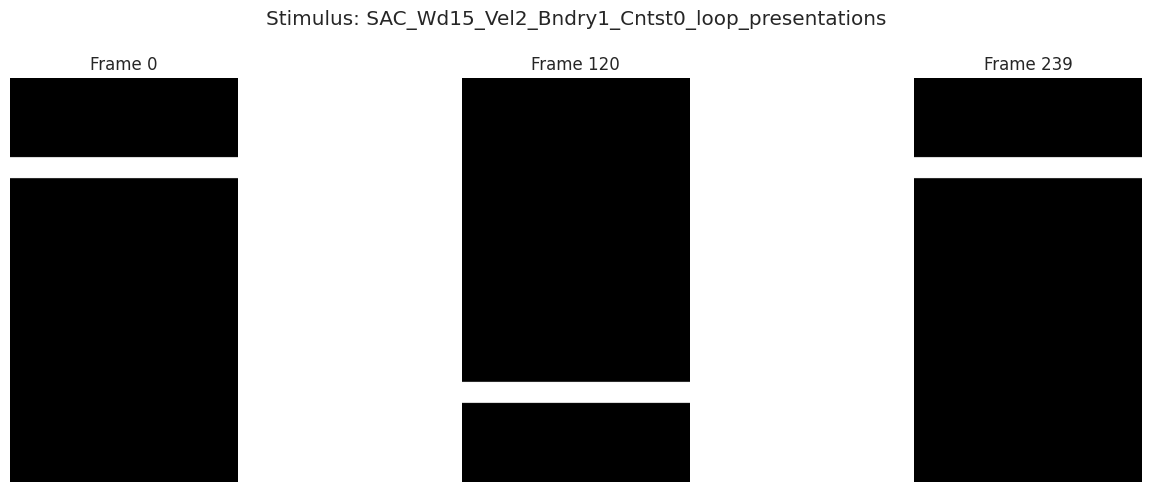

In [9]:
# Select a stimulus to visualize
stim_name = "SAC_Wd15_Vel2_Bndry1_Cntst0_loop_presentations"
template = nwb_img.stimulus_template[stim_name]

# The data is a movie with frames, let's extract the first, middle, and last frame
frames = []
frame_indices = [0, template.data.shape[2]//2, template.data.shape[2]-1]

for idx in frame_indices:
    frames.append(template.data[:, :, idx])

# Visualize the frames
fig, axes = plt.subplots(1, len(frames), figsize=(15, 5))
for i, (ax, frame) in enumerate(zip(axes, frames)):
    ax.imshow(frame, cmap='gray', vmin=0, vmax=255)
    ax.set_title(f"Frame {frame_indices[i]}")
    ax.axis('off')
plt.suptitle(f"Stimulus: {stim_name}")
plt.tight_layout()
plt.savefig('stimulus_frames.png', dpi=100)
plt.show()

## Examining the Electrophysiology Data

Now, let's look at the electrophysiology data from one of the probes. We'll use read signals from a probe's NWB file:

In [10]:
# URL of the probe NWB file (Probe 0)
probe_url = "https://api.dandiarchive.org/api/assets/ecaed1ec-a8b5-4fe7-87c1-baf68cfa900f/download/"

# Load probe NWB file
remote_file = remfile.File(probe_url)
h5_file = h5py.File(remote_file)
io_probe = pynwb.NWBHDF5IO(file=h5_file)
nwb_probe = io_probe.read()

# Print basic information about the probe data
print(f"Probe file: {nwb_probe.session_description}")

# Examine LFP data
print("\nLFP data available:")
for name in nwb_probe.acquisition.keys():
    if 'lfp' in name:
        lfp_data = nwb_probe.acquisition[name]
        print(f"- {name}:")
        if hasattr(lfp_data, 'data'):
            print(f"  Shape: {lfp_data.data.shape}")
            print(f"  Unit: {lfp_data.unit}")
        elif hasattr(lfp_data, 'electrical_series'):
            for es_name in lfp_data.electrical_series:
                es = lfp_data.electrical_series[es_name]
                print(f"  {es_name} Shape: {es.data.shape}")
                print(f"  {es_name} Unit: {es.unit}")

/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.6.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.3.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Probe file: LFP data and associated info for one probe

LFP data available:
- probe_0_lfp:
  probe_0_lfp_data Shape: (8965175, 84)
  probe_0_lfp_data Unit: volts
- probe_0_lfp_data:
  Shape: (8965175, 84)
  Unit: volts


Let's extract and plot some LFP data from a few channels over a short time window:

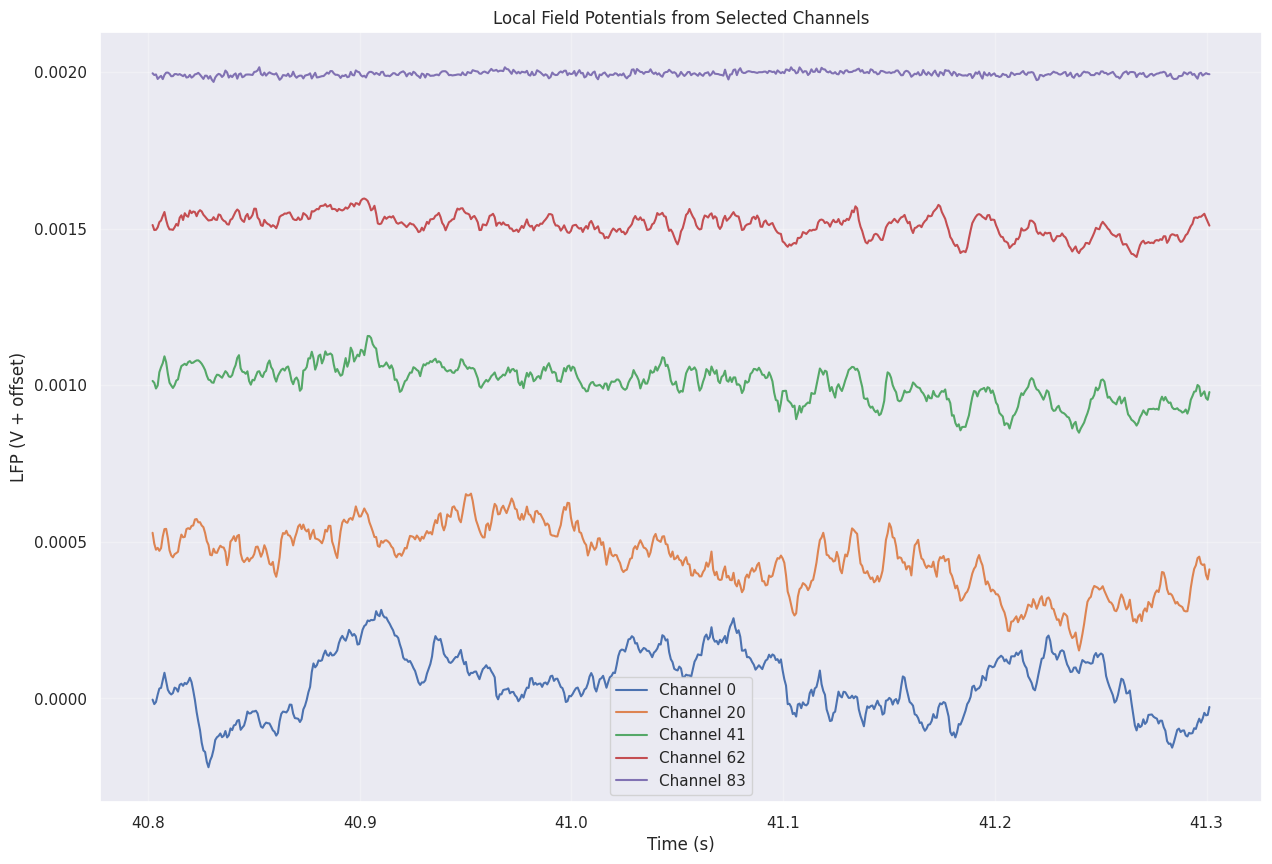

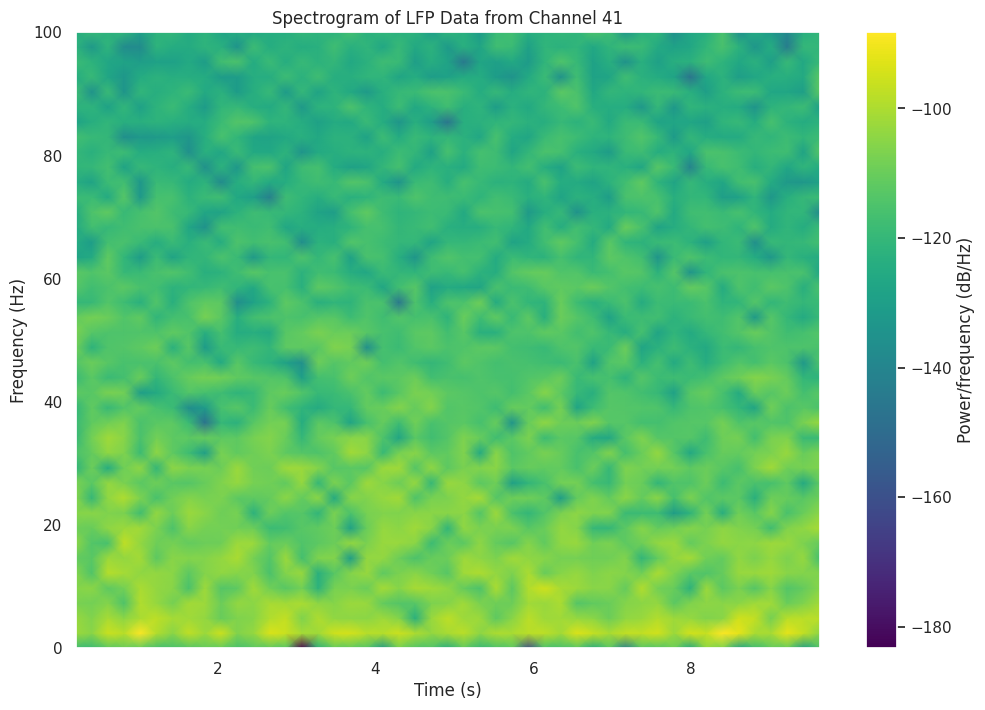

In [11]:
# Get LFP data
if 'probe_0_lfp_data' in nwb_probe.acquisition:
    lfp_data = nwb_probe.acquisition['probe_0_lfp_data']
    
    # Select a few channels and a short time window (first 1 second of data)
    num_channels_to_plot = 5
    channels_to_plot = np.linspace(0, lfp_data.data.shape[1]-1, num_channels_to_plot, dtype=int)
    
    # Calculate how many samples equals 1 second
    # Get the sampling rate information
    if hasattr(nwb_probe.electrode_groups['probeA'], 'lfp_sampling_rate'):
        sampling_rate = nwb_probe.electrode_groups['probeA'].lfp_sampling_rate
    else:
        # Estimate from timestamps
        sampling_rate = 1.0 / np.mean(np.diff(lfp_data.timestamps[:100]))
    
    samples_per_second = int(sampling_rate)
    time_window = lfp_data.data[:samples_per_second, channels_to_plot]
    time_values = lfp_data.timestamps[:samples_per_second]
    
    # Plot LFP traces
    plt.figure(figsize=(15, 10))
    for i, channel in enumerate(channels_to_plot):
        # Offset each channel for visibility
        offset = i * 500e-6  # Adjust based on signal amplitude
        plt.plot(time_values, time_window[:, i] + offset, label=f'Channel {channel}')
    
    plt.xlabel('Time (s)')
    plt.ylabel('LFP (V + offset)')
    plt.title('Local Field Potentials from Selected Channels')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.savefig('lfp_traces.png', dpi=100)
    plt.show()
    
    # Create a spectrogram for one channel
    from scipy import signal
    
    # Choose one channel
    channel_idx = channels_to_plot[2]
    
    # Get a longer segment of data for the spectrogram (10 seconds)
    spectrogram_length = min(int(10 * sampling_rate), len(lfp_data.timestamps))
    channel_data = lfp_data.data[:spectrogram_length, channel_idx]
    
    # Compute spectrogram
    f, t, Sxx = signal.spectrogram(channel_data, fs=sampling_rate, nperseg=256, noverlap=128)
    
    # Plot spectrogram
    plt.figure(figsize=(12, 8))
    plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud', cmap='viridis')
    plt.ylabel('Frequency (Hz)')
    plt.xlabel('Time (s)')
    plt.title(f'Spectrogram of LFP Data from Channel {channel_idx}')
    plt.colorbar(label='Power/frequency (dB/Hz)')
    plt.ylim(0, 100)  # Limit to frequencies of interest
    plt.savefig('lfp_spectrogram.png', dpi=100)
    plt.show()
else:
    print("LFP data not found in the expected format")

## Correlating Neural Activity with Stimuli

Now let's try to correlate neural activity with the visual stimuli. We'll examine spiking activity of a few units around the time of specific stimulus presentations.

Using stimulus: SAC_Wd15_Vel2_Bndry1_Cntst0_loop_presentations


Number of presentations: 57600
First few presentation times:
    start_time  stop_time
id                       
0    130.62476  130.64143
1    130.62476  130.64143
2    130.64143  130.65812
3    130.64143  130.65812
4    130.65812  130.67479


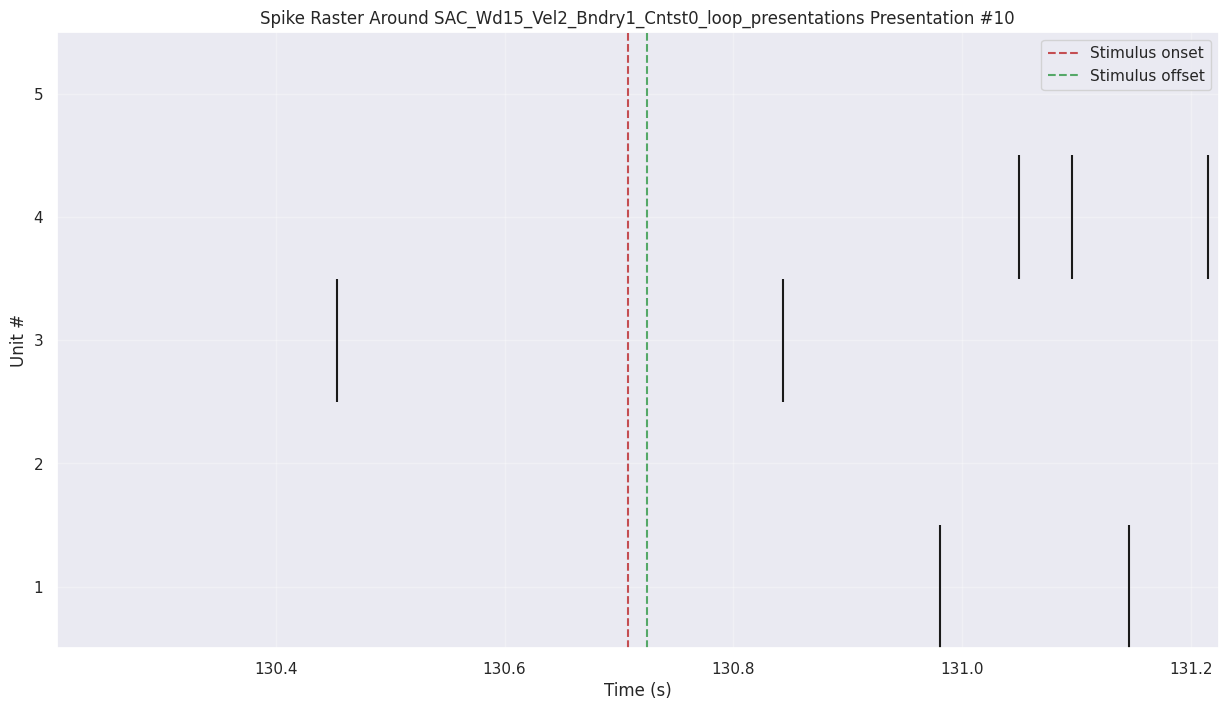

In [12]:
# First, let's identify the time intervals for a particular stimulus type
stim_name = "SAC_Wd15_Vel2_Bndry1_Cntst0_loop_presentations"
stim_intervals = nwb.intervals[stim_name]

print(f"Using stimulus: {stim_name}")
presentation_times = stim_intervals.to_dataframe()[['start_time', 'stop_time']]
print(f"Number of presentations: {len(presentation_times)}")
print("First few presentation times:")
print(presentation_times.head())

# Select a subset of units to analyze
num_units = 5
if len(nwb.units) > 0:
    units_to_plot = np.random.choice(range(len(nwb.units)), 
                                     size=min(num_units, len(nwb.units)), 
                                     replace=False)
    
    # Plot spike raster around a stimulus presentation
    presentation_idx = 10  # Use the 10th presentation for this example
    start_time = presentation_times.iloc[presentation_idx]['start_time']
    end_time = presentation_times.iloc[presentation_idx]['stop_time']
    
    # Add some padding before and after the stimulus
    padding = 0.5  # 500 ms padding
    window_start = start_time - padding
    window_end = end_time + padding
    
    # Create the raster plot
    plt.figure(figsize=(15, 8))
    
    for i, unit_idx in enumerate(units_to_plot):
        if 'spike_times' in nwb.units:
            spike_times = nwb.units['spike_times'][unit_idx]
            if spike_times is not None:
                # Filter spikes within our time window
                mask = (spike_times >= window_start) & (spike_times <= window_end)
                spikes_in_window = spike_times[mask]
                
                # Plot raster
                plt.vlines(spikes_in_window, i + 0.5, i + 1.5, colors='k')
    
    # Add markers for stimulus onset and offset
    plt.axvline(start_time, color='r', linestyle='--', label='Stimulus onset')
    plt.axvline(end_time, color='g', linestyle='--', label='Stimulus offset')
    
    plt.xlabel('Time (s)')
    plt.ylabel('Unit #')
    plt.title(f'Spike Raster Around {stim_name} Presentation #{presentation_idx}')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xlim(window_start, window_end)
    plt.ylim(0.5, len(units_to_plot) + 0.5)
    plt.savefig('spike_raster.png', dpi=100)
    plt.show()
else:
    print("No units found in the main NWB file")

## Visualizing Eye Tracking Data

This dataset also includes eye tracking data, which can be useful to correlate with neural activity and stimulus presentations.

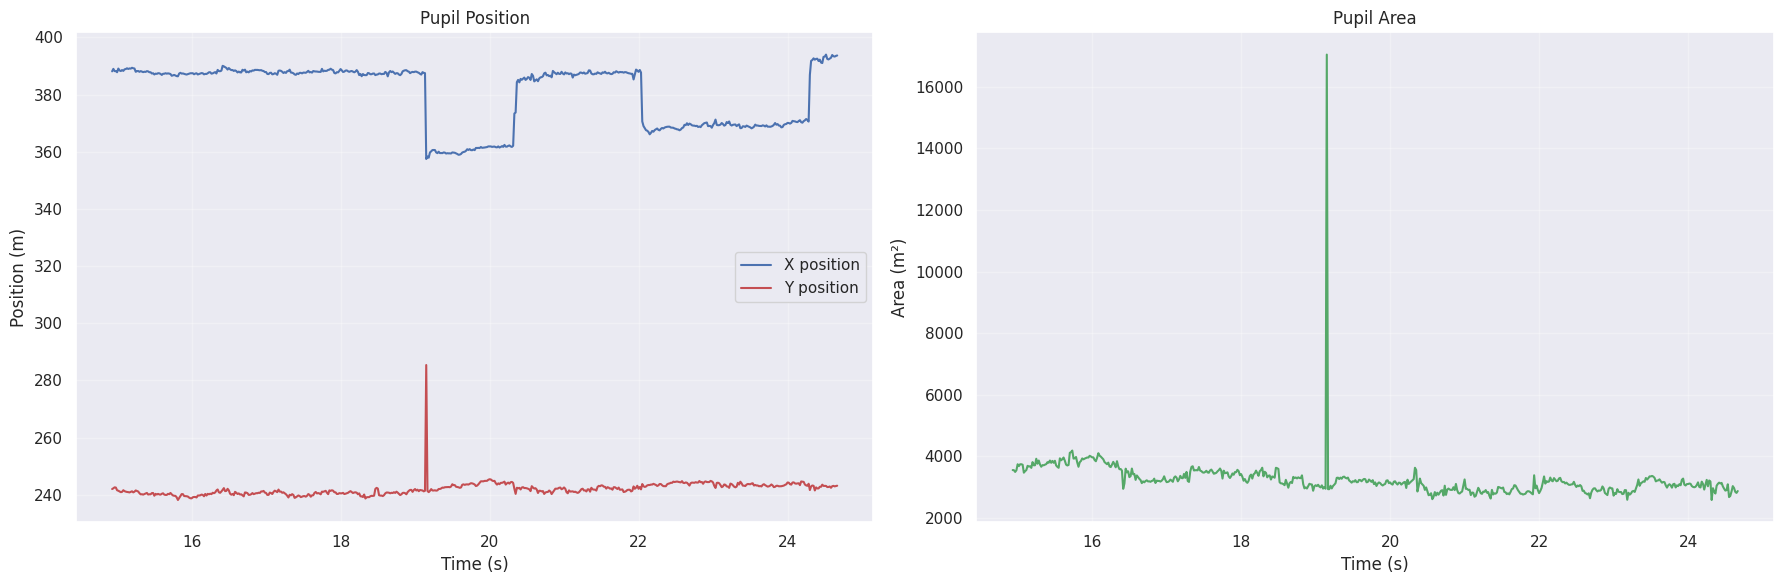

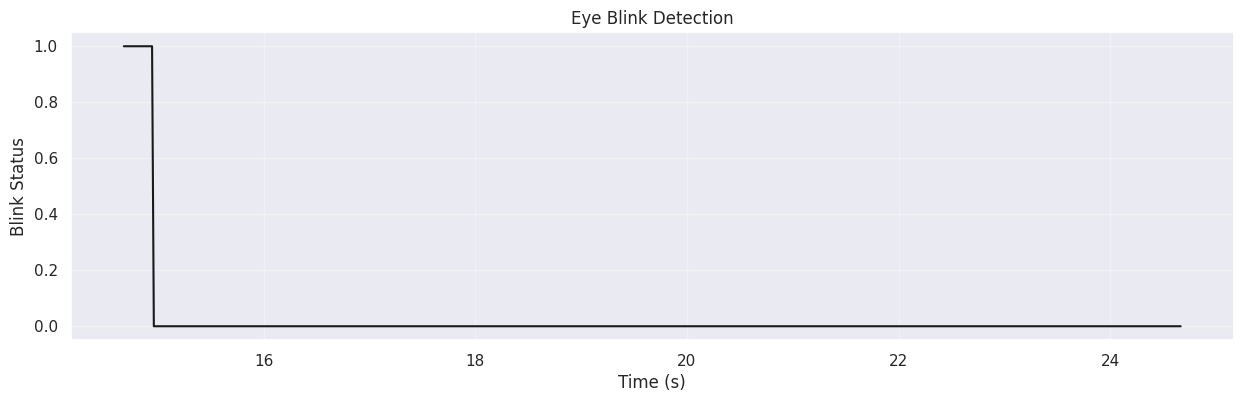

In [13]:
# Check if eye tracking data is available
if 'EyeTracking' in nwb.acquisition:
    eye_tracking = nwb.acquisition['EyeTracking']
    
    # Get pupil data
    if hasattr(eye_tracking, 'pupil_tracking'):
        pupil_data = eye_tracking.pupil_tracking
        
        # Get a sample of data (10 seconds)
        sample_size = 10 * 60  # assuming approximately 60 Hz sampling rate
        sample_size = min(sample_size, len(pupil_data.timestamps))
        
        pupil_times = pupil_data.timestamps[:sample_size]
        pupil_positions = pupil_data.data[:sample_size]
        pupil_area = pupil_data.area[:sample_size]
        
        # Plot pupil position (x, y coordinates)
        plt.figure(figsize=(18, 6))
        
        plt.subplot(1, 2, 1)
        plt.plot(pupil_times, pupil_positions[:, 0], 'b-', label='X position')
        plt.plot(pupil_times, pupil_positions[:, 1], 'r-', label='Y position')
        plt.xlabel('Time (s)')
        plt.ylabel('Position (m)')
        plt.title('Pupil Position')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        plt.subplot(1, 2, 2)
        plt.plot(pupil_times, pupil_area, 'g-')
        plt.xlabel('Time (s)')
        plt.ylabel('Area (m²)')
        plt.title('Pupil Area')
        plt.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.savefig('eye_tracking.png', dpi=100)
        plt.show()
    
    # Check for blink data
    if hasattr(eye_tracking, 'likely_blink'):
        blink_data = eye_tracking.likely_blink
        
        # Get a sample of blink data
        sample_size = min(10 * 60, len(blink_data.timestamps))  # 10 seconds of data
        blink_times = blink_data.timestamps[:sample_size]
        blink_status = blink_data.data[:sample_size]
        
        plt.figure(figsize=(15, 4))
        plt.plot(blink_times, blink_status, 'k-')
        plt.xlabel('Time (s)')
        plt.ylabel('Blink Status')
        plt.title('Eye Blink Detection')
        plt.grid(True, alpha=0.3)
        plt.savefig('blink_detection.png', dpi=100)
        plt.show()
else:
    print("Eye tracking data not found")

## Visualizing Running Wheel Data

The dataset also includes data from a running wheel, which can provide insights into the animal's behavioral state during the recordings.

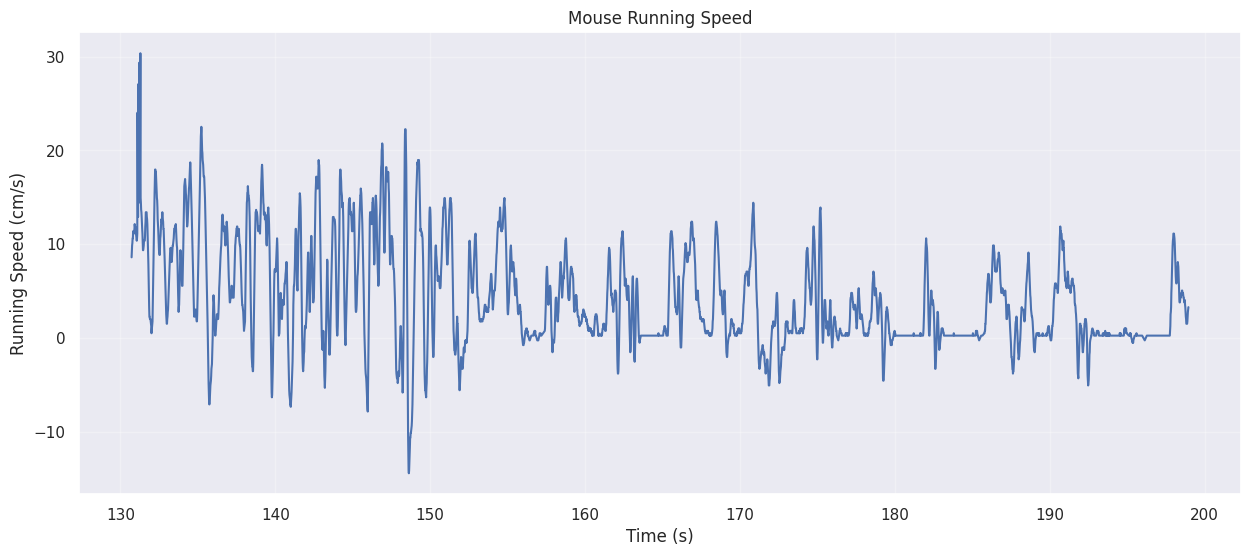

Mean running speed: 4.65 cm/s
Max running speed: 30.37 cm/s
Percentage of time spent moving (speed > 5.0 cm/s): 40.9%


In [14]:
# Check if running wheel data is available
if 'running' in nwb.processing:
    running_module = nwb.processing['running']
    
    if 'running_speed' in running_module.data_interfaces:
        running_speed = running_module.data_interfaces['running_speed']
        
        # Get a sample of data (1 minute)
        sample_size = 60 * 60  # assuming approximately 60 Hz sampling rate
        sample_size = min(sample_size, len(running_speed.timestamps))
        
        speed_times = running_speed.timestamps[:sample_size]
        speed_data = running_speed.data[:sample_size]
        
        plt.figure(figsize=(15, 6))
        plt.plot(speed_times, speed_data, 'b-')
        plt.xlabel('Time (s)')
        plt.ylabel('Running Speed (cm/s)')
        plt.title('Mouse Running Speed')
        plt.grid(True, alpha=0.3)
        plt.savefig('running_speed.png', dpi=100)
        plt.show()
        
        # Calculate some statistics
        mean_speed = np.mean(speed_data)
        max_speed = np.max(speed_data)
        
        print(f"Mean running speed: {mean_speed:.2f} cm/s")
        print(f"Max running speed: {max_speed:.2f} cm/s")
        
        # Compute moving/stationary periods
        speed_threshold = 5.0  # cm/s, threshold for considering the animal to be moving
        is_moving = speed_data > speed_threshold
        moving_percentage = np.mean(is_moving) * 100
        
        print(f"Percentage of time spent moving (speed > {speed_threshold} cm/s): {moving_percentage:.1f}%")
else:
    print("Running wheel data not found")

## Exploring the Relationship Between Neural Activity and Behavior

Let's analyze how neural activity might correlate with the animal's behavior. We'll examine the relationship between running speed and neural firing rates.

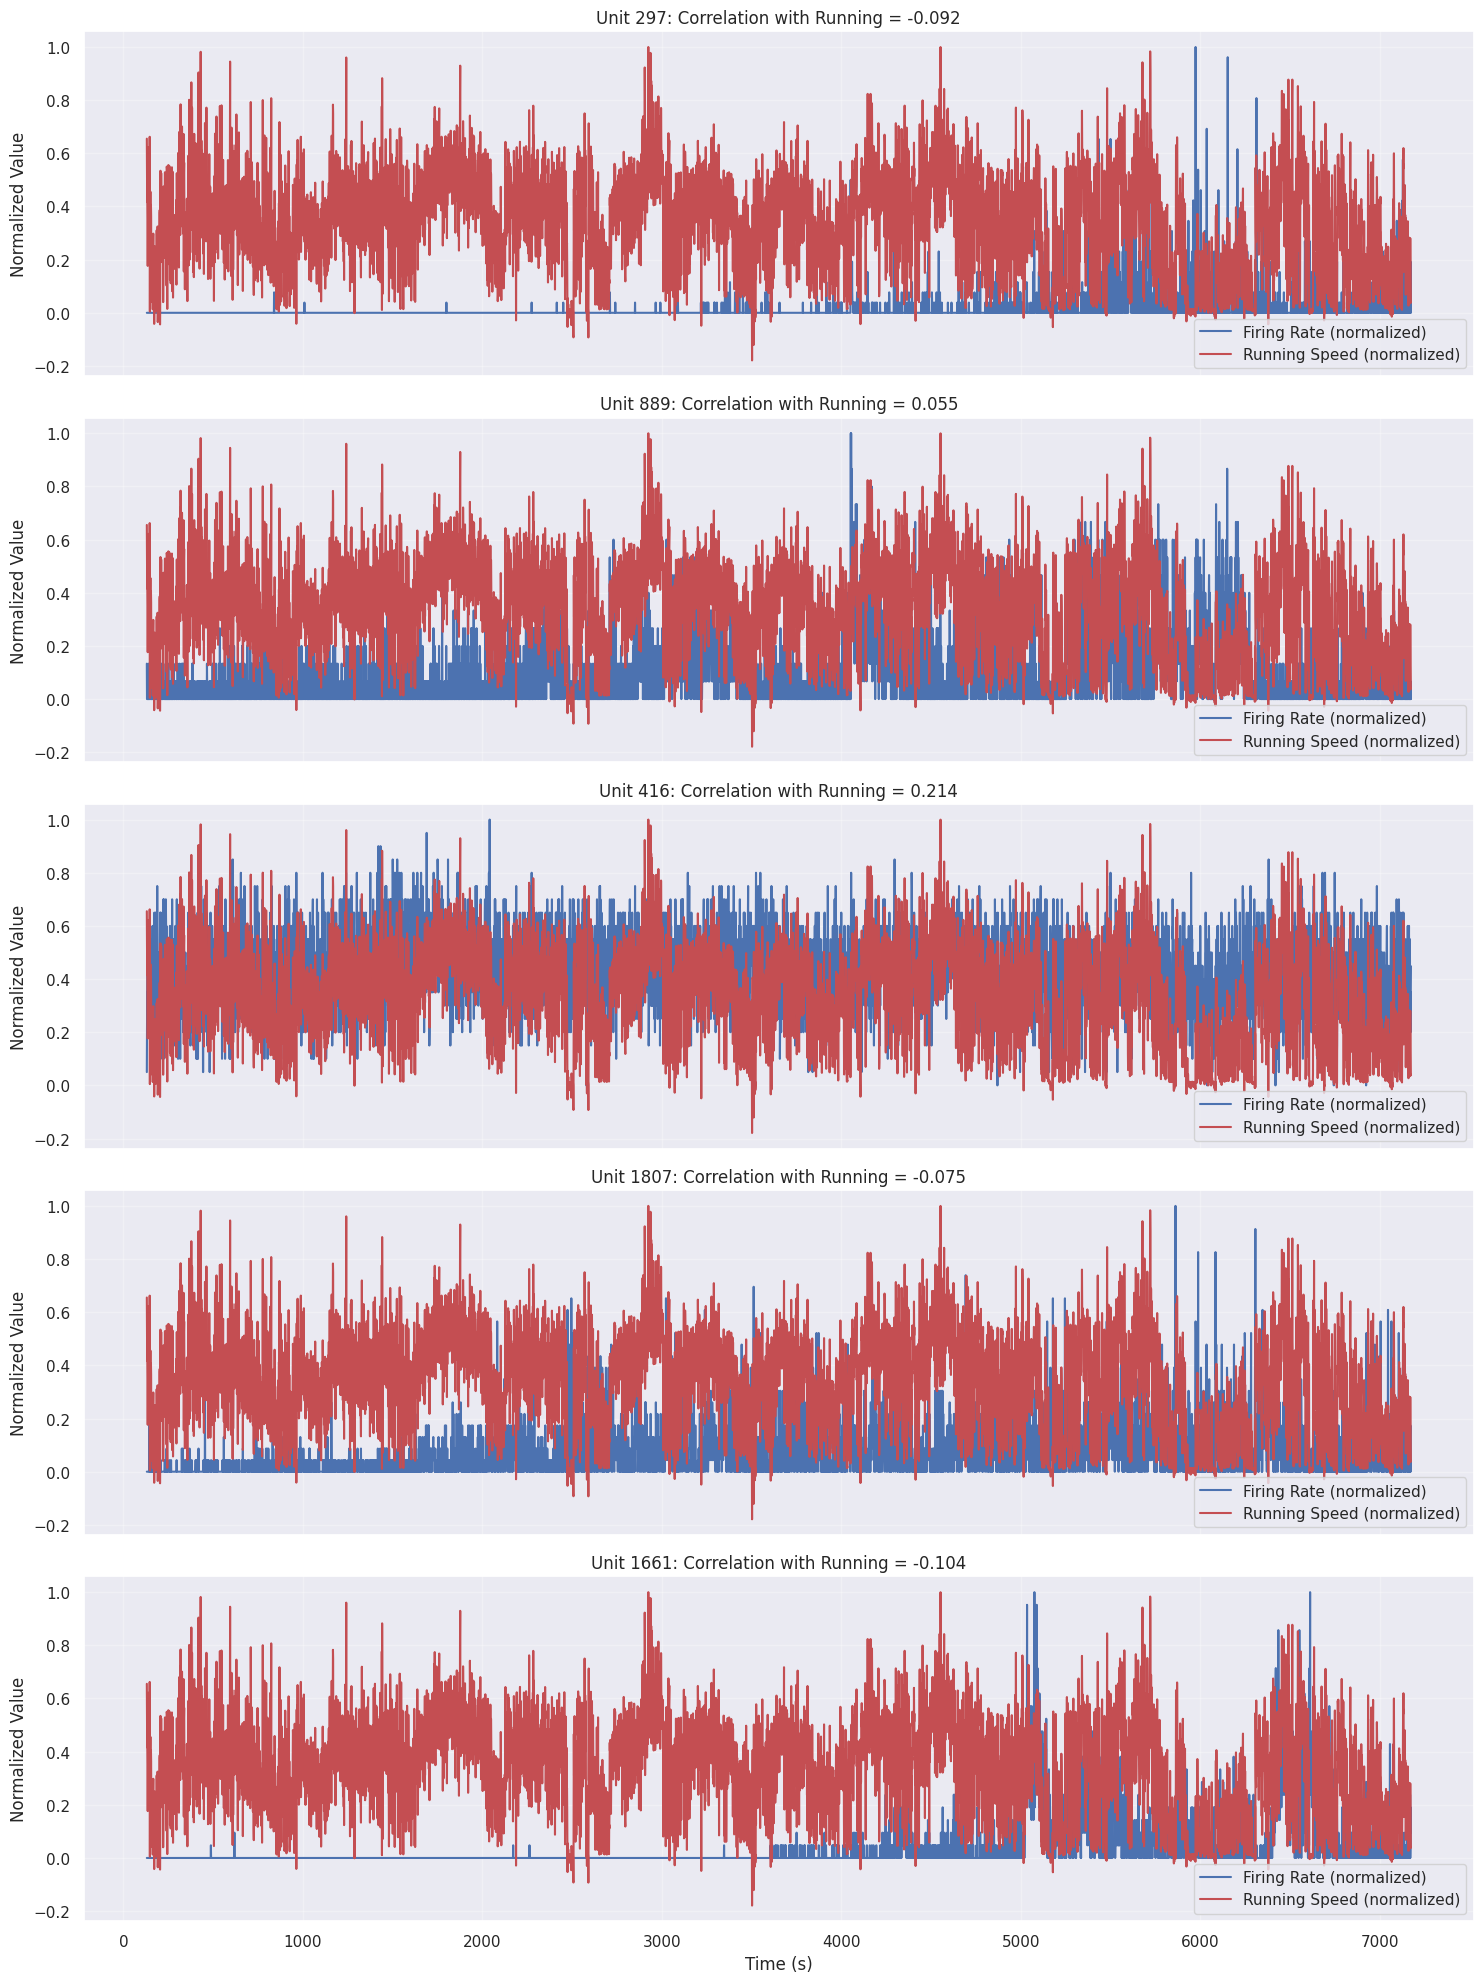

In [15]:
# This section requires us to align running speed data with spike times
# First, let's resample running speed data into bins

if 'running' in nwb.processing and len(nwb.units) > 0:
    running_module = nwb.processing['running']
    
    if 'running_speed' in running_module.data_interfaces:
        running_speed = running_module.data_interfaces['running_speed']
        
        # Define time bins (e.g., 1-second bins)
        bin_size = 1.0  # seconds
        t_start = running_speed.timestamps[0]
        t_end = running_speed.timestamps[-1]
        bins = np.arange(t_start, t_end, bin_size)
        
        # Create bins for speed data
        speed_binned = np.zeros(len(bins) - 1)
        for i in range(len(bins) - 1):
            mask = (running_speed.timestamps >= bins[i]) & (running_speed.timestamps < bins[i+1])
            if np.any(mask):
                speed_binned[i] = np.mean(running_speed.data[mask])
        
        # Select a few units to analyze
        num_units_to_analyze = min(5, len(nwb.units))
        units_to_analyze = np.random.choice(range(len(nwb.units)), size=num_units_to_analyze, replace=False)
        
        # Set up the plot
        fig, axes = plt.subplots(num_units_to_analyze, 1, figsize=(15, 4*num_units_to_analyze), sharex=True)
        
        for i, unit_idx in enumerate(units_to_analyze):
            # Get spike times for this unit
            if 'spike_times' in nwb.units:
                spike_times = nwb.units['spike_times'][unit_idx]
                
                if spike_times is not None and len(spike_times) > 0:
                    # Compute firing rate for each bin
                    firing_rates = np.zeros(len(bins) - 1)
                    for j in range(len(bins) - 1):
                        mask = (spike_times >= bins[j]) & (spike_times < bins[j+1])
                        firing_rates[j] = np.sum(mask) / bin_size  # spikes per second
                    
                    # Calculate correlation between firing rate and running speed
                    correlation = np.corrcoef(speed_binned, firing_rates)[0, 1]
                    
                    # Plot firing rate and running speed
                    ax = axes[i] if num_units_to_analyze > 1 else axes
                    
                    # Normalize for plotting on same axis
                    fr_norm = firing_rates / np.max(firing_rates) if np.max(firing_rates) > 0 else firing_rates
                    speed_norm = speed_binned / np.max(speed_binned) if np.max(speed_binned) > 0 else speed_binned
                    
                    ax.plot(bins[:-1], fr_norm, 'b-', label='Firing Rate (normalized)')
                    ax.plot(bins[:-1], speed_norm, 'r-', label='Running Speed (normalized)')
                    ax.set_ylabel('Normalized Value')
                    ax.set_title(f'Unit {unit_idx}: Correlation with Running = {correlation:.3f}')
                    ax.legend()
                    ax.grid(True, alpha=0.3)
        
        plt.xlabel('Time (s)')
        plt.tight_layout()
        plt.savefig('neural_behavior_correlation.png', dpi=100)
        plt.show()
else:
    print("Required data for neural-behavioral analysis not found")

## Summary and Conclusions

In this notebook, we explored Dandiset 000690, the Allen Institute Openscope - Vision2Hippocampus project. This dataset contains rich neural recordings from multiple brain regions in mice while they were presented with various visual stimuli.

Key aspects of the dataset that we explored:

1. **Dataset Structure**: We examined the organization of the NWB files, which include session metadata, electrophysiology recordings, stimulus information, and behavioral data.

2. **Visual Stimuli**: The dataset contains recordings during presentations of various stimuli, including moving bars with different properties and natural movies.

3. **Neural Activity**: We looked at both LFP data and spike data from neurons recorded across different brain regions.

4. **Behavioral Measures**: The dataset includes eye tracking data and running wheel activity, allowing for correlations between neural activity and behavior.

This dataset is valuable for studying how visual information is processed and transformed as it moves through the brain, particularly how the transition from specific visual features to abstract concepts may occur between primary visual areas and the hippocampus.

## Future Directions

Here are some potential analyses that could be performed with this dataset:

1. **Receptive Field Mapping**: Using the stimulus presentations to map receptive fields of neurons in different brain regions.

2. **Information Flow Analysis**: Tracking how information about specific visual features propagates through the brain.

3. **Neural Encoding Models**: Building encoding models to predict neural responses to visual stimuli.

4. **State-Dependent Processing**: Analyzing how behavioral states (running/stationary, eye movements) affect visual processing.

5. **Comparative Analysis**: Comparing responses to artificial stimuli (bars) versus natural stimuli (movies) across brain regions.

This notebook provides a starting point for exploring the dataset, but there are many more sophisticated analyses that could be performed to gain deeper insights into visual processing in the brain.